## Linear and Logistic Regression - 01  ##
  
  
**Reference**
- TJ Tsai's TensorFlow: 2維空間的線性回歸
- [Deep MNIST for Experts](https://www.tensorflow.org/get_started/mnist/pros)
- [Optimizers](https://www.tensorflow.org/api_guides/python/train#Optimizers)
- [Getting Started With TensorFlow - tf.train API](https://www.tensorflow.org/get_started/get_started#tftrain_api)
- [tf.train.GradientDescentOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/GradientDescentOptimizer)
- [tf.train.AdagradOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/AdagradOptimizer), [PAPER](http://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf), [Introduction](http://cs.stanford.edu/~ppasupat/a9online/uploads/proximal_notes.pdf)
- [tf.train.RMSPropOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/RMSPropOptimizer), [PAPER](http://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)
- [tf.train.AdamOptimizer](https://www.tensorflow.org/api_docs/python/tf/train/AdamOptimizer), [PAPER](http://arxiv.org/abs/1412.6980)
- [Stanford - CS231n: Convolutional Neural Networks for Visual Recognition - Optimization: Stochastic Gradient Descent](http://cs231n.github.io/optimization-1/)
- [An overview of gradient descent optimization algorithms](https://arxiv.org/abs/1609.04747)


In [37]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf



In [38]:
DATA_COUNT = 1000

X_points = []
Y_points = []

a = 0.22
b = 0.78

for _ in range(DATA_COUNT):
    x = np.random.normal(0, 0.5)
    y = a * x + b + np.random.normal(0, 0.1)
    X_points.append(x)
    Y_points.append(y)


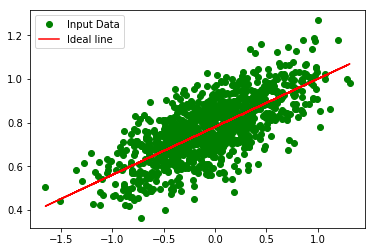

In [39]:
ideal_Y_points = [];

for x in X_points:
    ideal_Y = a * x + b
    ideal_Y_points.append(ideal_Y)

plt.plot(X_points, Y_points, "go", label="Input Data")
plt.plot(X_points, ideal_Y_points, color="red", label="Ideal line")
plt.legend()
plt.show()

In [40]:
A = tf.Variable([1], dtype=tf.float32)
B = tf.Variable([0], dtype=tf.float32)

y = A * X_points + B
diff = y - Y_points

cost_function = tf.reduce_mean(tf.square(diff))

learning_rate = 0.5
train_count = 20

optimizer_1 = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op_1 = optimizer_1.minimize(cost_function)

optimizer_2 = tf.train.AdagradOptimizer(learning_rate=learning_rate)
train_op_2 = optimizer_2.minimize(cost_function)

optimizer_3 = tf.train.RMSPropOptimizer(learning_rate=learning_rate)
train_op_3 = optimizer_3.minimize(cost_function)

optimizer_4 = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op_4 = optimizer_4.minimize(cost_function)


In [41]:
init_op = tf.global_variables_initializer()

session_1 = tf.Session()
session_2 = tf.Session()
session_3 = tf.Session()
session_4 = tf.Session()
session_1.run(init_op)
session_2.run(init_op)
session_3.run(init_op)
session_4.run(init_op)


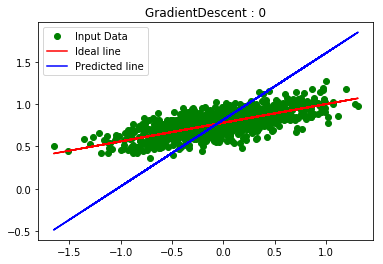

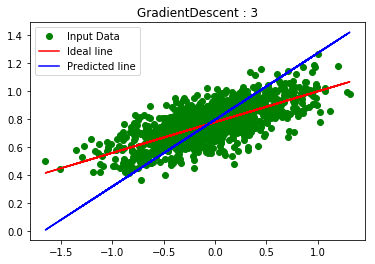

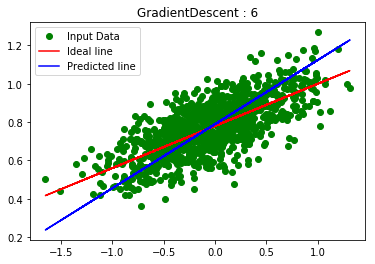

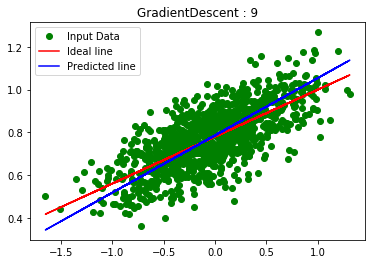

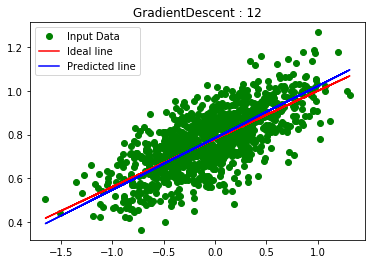

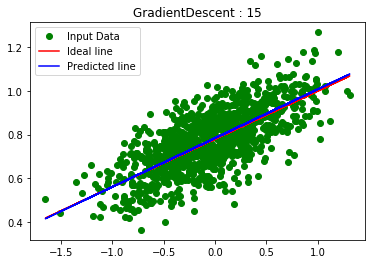

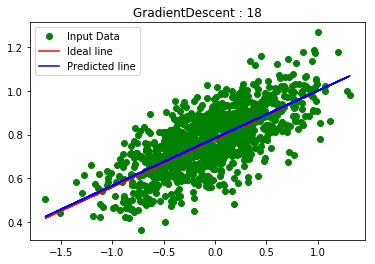

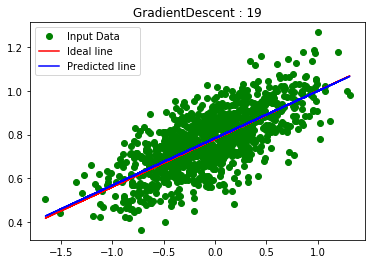

In [42]:
for i in range(train_count):
    session_1.run(train_op_1)
   
    if i % 3 == 0 or train_count - 1 == i:
        title = "GradientDescent : {}".format(i)
        plt.title(title)
        
        plt.plot(X_points, Y_points, 'go', label="Input Data")
        plt.plot(X_points, ideal_Y_points, color="red", label="Ideal line")
        plt.plot(X_points, A.eval(session_1) * X_points + B.eval(session_1), color="blue", label="Predicted line")

        plt.legend()
        plt.show()
        

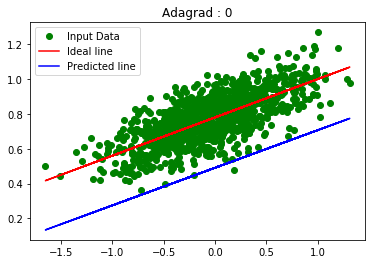

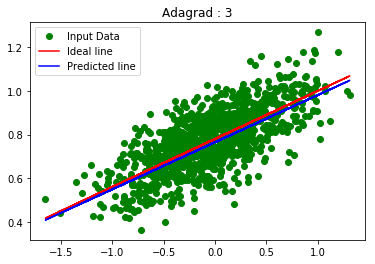

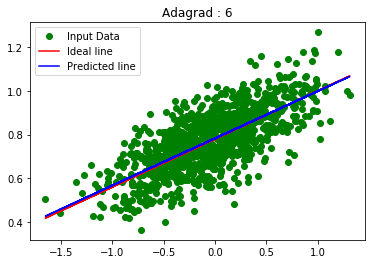

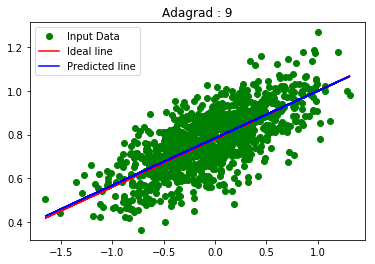

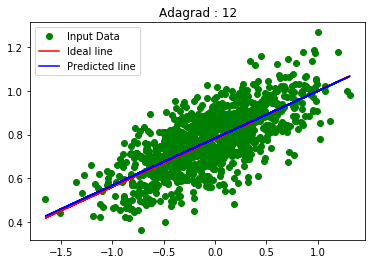

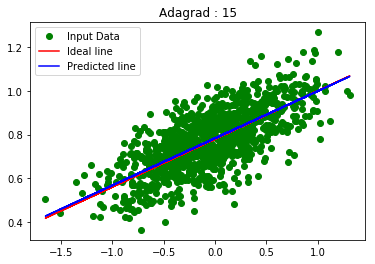

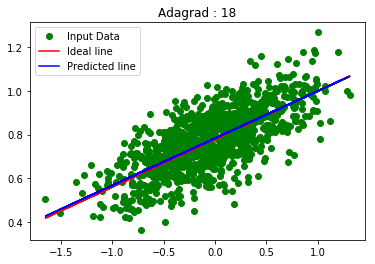

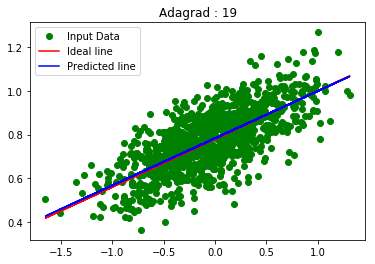

In [43]:
for i in range(train_count):
    session_2.run(train_op_2)
   
    if i % 3 == 0 or train_count - 1 == i:
        title = "Adagrad : {}".format(i)
        plt.title(title)
        
        plt.plot(X_points, Y_points, 'go', label="Input Data")
        plt.plot(X_points, ideal_Y_points, color="red", label="Ideal line")
        plt.plot(X_points, A.eval(session_1) * X_points + B.eval(session_2), color="blue", label="Predicted line")

        plt.legend()
        plt.show()
        

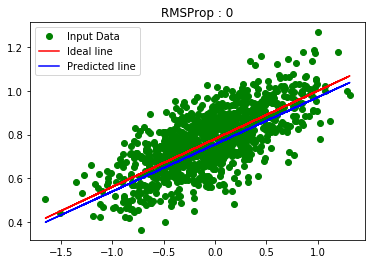

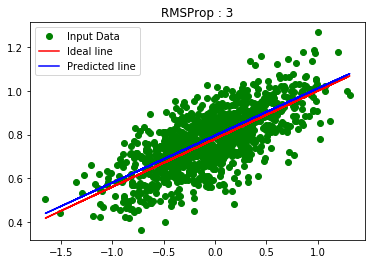

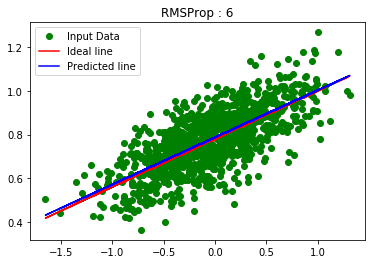

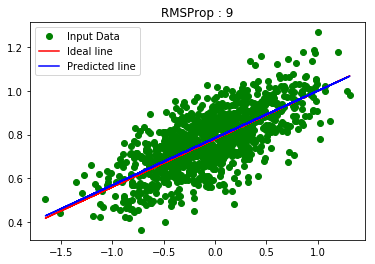

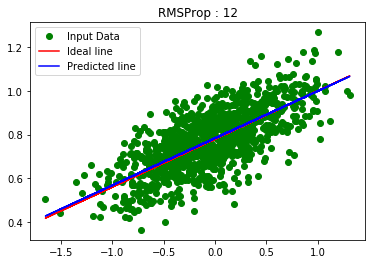

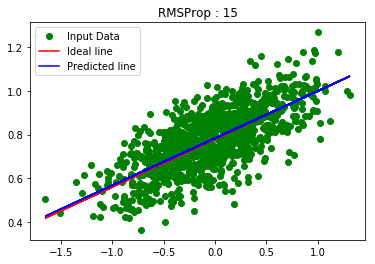

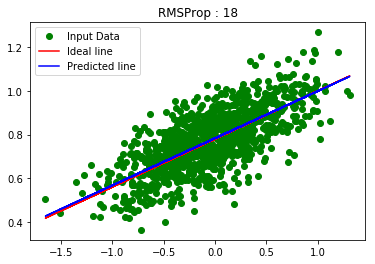

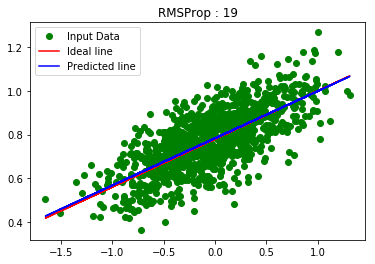

In [44]:
for i in range(train_count):
    session_3.run(train_op_3)
   
    if i % 3 == 0 or train_count - 1 == i:
        title = "RMSProp : {}".format(i)
        plt.title(title)
        
        plt.plot(X_points, Y_points, 'go', label="Input Data")
        plt.plot(X_points, ideal_Y_points, color="red", label="Ideal line")
        plt.plot(X_points, A.eval(session_1) * X_points + B.eval(session_3), color="blue", label="Predicted line")

        plt.legend()
        plt.show()

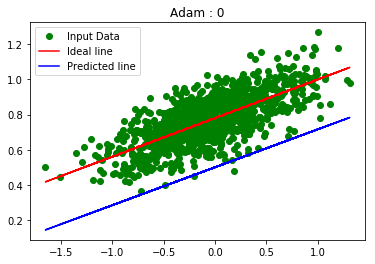

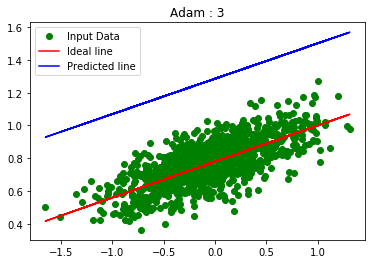

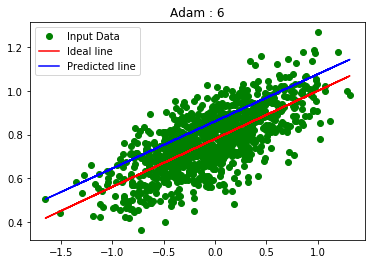

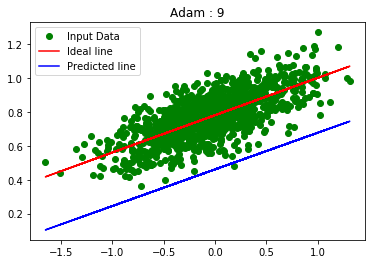

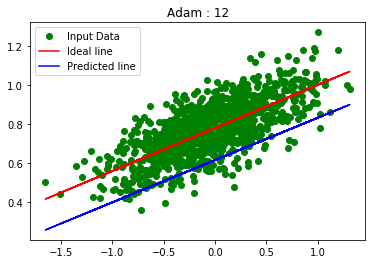

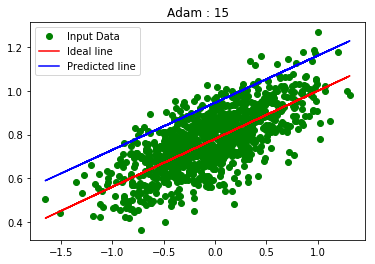

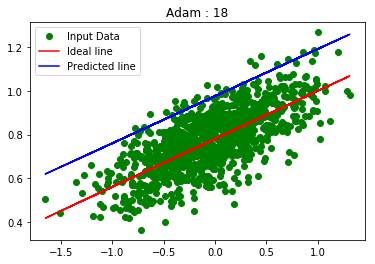

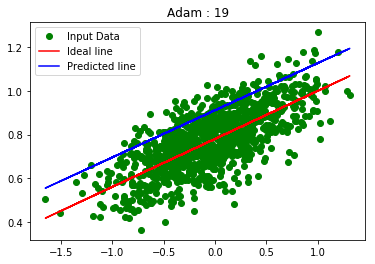

In [45]:
for i in range(train_count):
    session_4.run(train_op_4)
   
    if i % 3 == 0 or train_count - 1 == i:
        title = "Adam : {}".format(i)
        plt.title(title)
        
        plt.plot(X_points, Y_points, 'go', label="Input Data")
        plt.plot(X_points, ideal_Y_points, color="red", label="Ideal line")
        plt.plot(X_points, A.eval(session_1) * X_points + B.eval(session_4), color="blue", label="Predicted line")

        plt.legend()
        plt.show()
        